**Importing Necessary Libraries:**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, LSTM, MaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

**Understanding the data:**

In [ ]:
data = pd.read_csv('/content/Modified_SQL_Dataset.csv')
print("Columns in the dataset:", data.columns)
print("First few rows of the dataset:", data.head(10))

# Checking for NULL values
print("Before dropping NaNs:", data.shape[0])
data.dropna(inplace=True)
print("After dropping NaNs:", data.shape[0])
print("Null values in the DataFrame:\n", data.isnull().sum())

# Check for non-integer labels
print("Unique labels in 'Label':", data['Label'].unique())


Columns in the dataset: Index(['Query', 'Label'], dtype='object')
First few rows of the dataset:                                                Query  Label
0                  " or pg_sleep  (  __TIME__  )  --      1
1  create user name identified by pass123 tempora...      1
2   AND 1  =  utl_inaddr.get_host_address   (    ...      1
3   select * from users where id  =  '1' or @ @1 ...      1
4   select * from users where id  =  1 or 1#"  ( ...      1
5   select name from syscolumns where id   =     ...      1
6  select * from users where id  =  1 +$+ or 1  =...      1
7  1;  (  load_file  (  char  (  47,101,116,99,47...      1
8   select * from users where id  =  '1' or ||/1 ...      1
9   select * from users where id  =  '1' or \.<\ ...      1
Before dropping NaNs: 30919
After dropping NaNs: 30919
Null values in the DataFrame:
 Query    0
Label    0
dtype: int64
Unique labels in 'Label': [1 0]


**Pre-processing data and Tokenizing**

In [ ]:
X = data['Query'].values
y = data['Label'].values

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
max_seq_length = max([len(seq) for seq in X])
X = pad_sequences(X, maxlen = max_seq_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Calculating Vocabulary size
vocab_size = len(tokenizer.word_index) + 1

embedding_dim = 100

**Building the model**

In [ ]:
model = Sequential()

# Embedding Layer to represent words as dense vectors
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_seq_length))

# CNN Layer
model.add(Conv1D(filters=128,kernel_size=5, activation = 'relu'))
model.add(MaxPooling1D(pool_size=2))

# RNN Layer
model.add(LSTM(64, return_sequences=False))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = Adam(), loss = 'binary_crossentropy', metrics = ['accuracy'])

trained_model = model.fit(X_train, y_train, epochs=18, batch_size=64, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert predictions to binary (0 or 1)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Epoch 1/18


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


387/387 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9137 - loss: 0.1993 - val_accuracy: 0.9948 - val_loss: 0.0235
Epoch 2/18
387/387 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9958 - loss: 0.0188 - val_accuracy: 0.9947 - val_loss: 0.0234
Epoch 3/18
387/387 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9977 - loss: 0.0109 - val_accuracy: 0.9953 - val_loss: 0.0288
Epoch 4/18
387/387 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9987 - loss: 0.0037 - val_accuracy: 0.9918 - val_loss: 0.0381
Epoch 5/18
387/387 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9994 - loss: 0.0018 - val_accuracy: 0.9961 - val_loss: 0.0270
Epoch 6/18
387/387 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9994 - loss: 0.0015 - val_accuracy: 0.9943 - val_loss: 0.0268
Epoch 7/18
387/387 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9995 - loss: 0.0016 - val_accuracy: 0.9911 - val_loss: 0.0458
Epoch 8/18
387/387 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9998 - loss: 6.9341e-04 - val_accur

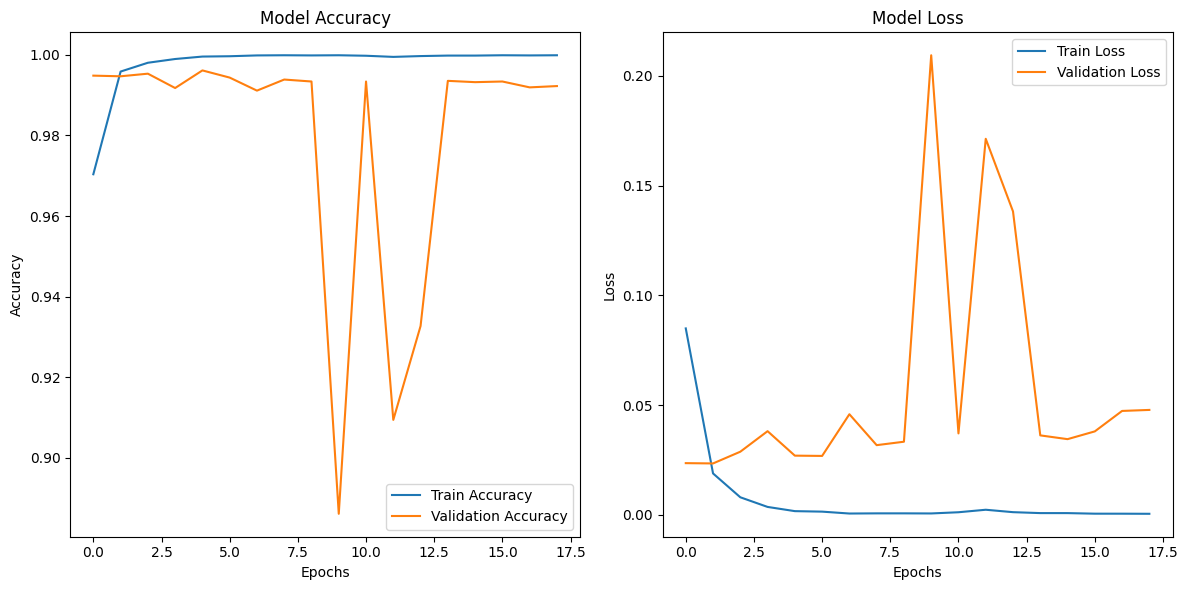

In [ ]:
# Plotting Accuracy and Loss over Epochs
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(trained_model.history['accuracy'], label='Train Accuracy')
plt.plot(trained_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(trained_model.history['loss'], label='Train Loss')
plt.plot(trained_model.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
cm = confusion_matrix(y_test, predictions)

# Extracting values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculating precision and recall manually
precision = tp / (tp + fp)
recall = tp / (tp + fn)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.9861
Recall: 0.9930


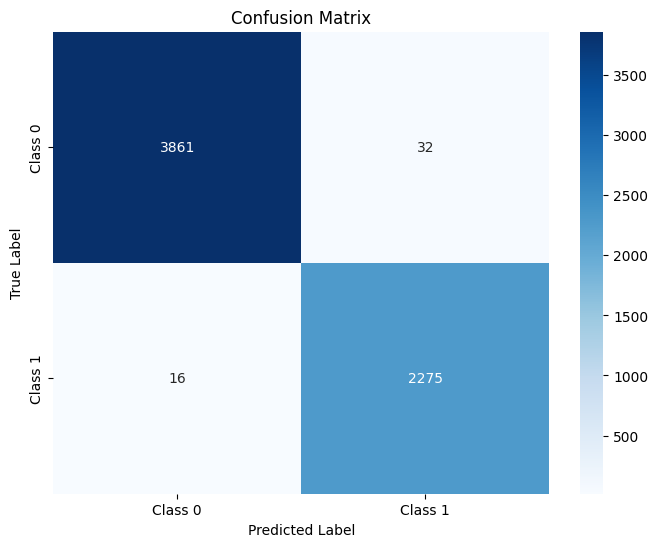

In [ ]:
# Confusion Matrix Plot

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


[0.37047219 0.98612917 1.        ] [1.         0.99301615 0.        ]


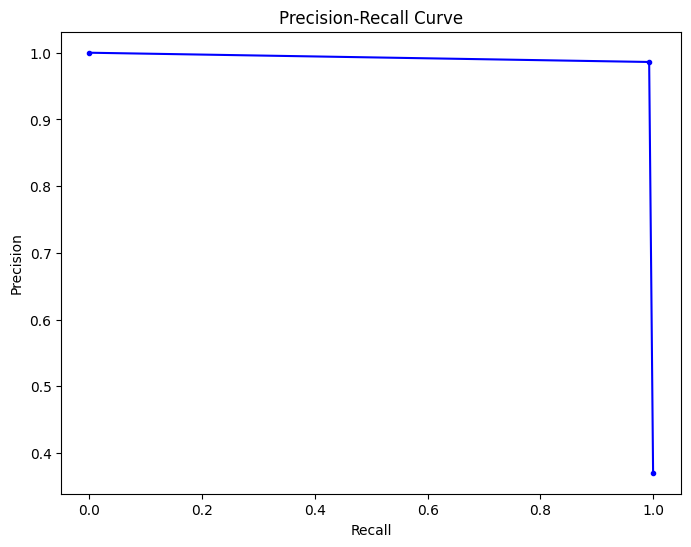

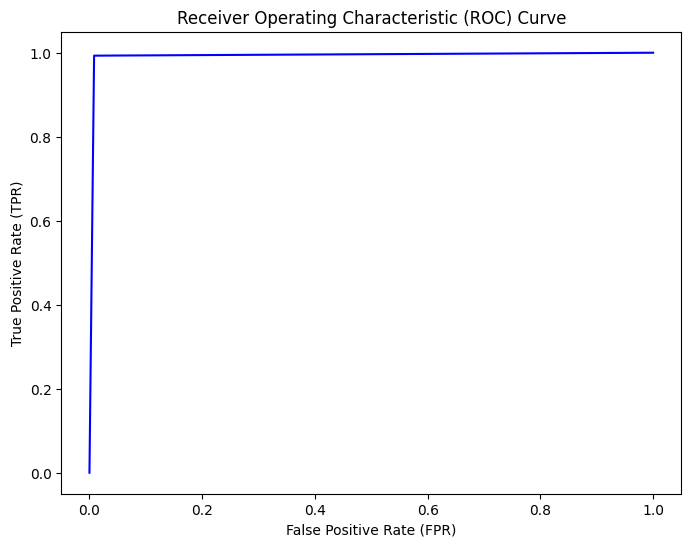

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, predictions)
print(precision, recall)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='b', label='Precision-Recall curve')

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Display the plot
plt.show()

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()
